In [11]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dummydata.txt', header=None)
df.columns = ['DateTime','CAT','DOG']
df.dropna(inplace=True)

In [15]:
n = df.shape[0]
n_dim_state = 2;

history_state_means = np.zeros((n, n_dim_state))
history_state_covs = np.zeros((n, n_dim_state, n_dim_state))

In [16]:

for idx, row in df.iterrows():
    if idx == 0: # Initialize the Kalman filter
        delta = 1e-9
        trans_cov = delta / (1 - delta) * np.eye(2)

        obs_mat = [df.iloc[0].CAT, 1]

        kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                          initial_state_mean=np.zeros(2),
                          initial_state_covariance=np.ones((2, 2)),
                          transition_matrices=np.eye(2),
                          observation_matrices=obs_mat,
                          observation_covariance=1.0,
                          transition_covariance=trans_cov)

        history_state_means[0], history_state_covs[0] = kf.filter(np.asarray(df.iloc[0].DOG))
        slope=history_state_means[0, 0]
        print("SLOPE", slope)

    else:
        obs_mat = np.asarray([[df.iloc[idx].CAT, 1]])

        history_state_means[idx], history_state_covs[idx] = kf.filter_update(history_state_means[idx-1], 
                                                            history_state_covs[idx-1], 
                                                            observation = df.iloc[idx].DOG, 
                                                            observation_matrix=obs_mat)
        slope=history_state_means[idx, 0]
        print("SLOPE", slope)

SLOPE 6.703224641988576
SLOPE 6.705120372688268
SLOPE 6.703378086487903
SLOPE 6.699564067846928
SLOPE 6.696176795304429
SLOPE 6.6955843882776
SLOPE 6.695816826675824
SLOPE 6.696176704592797


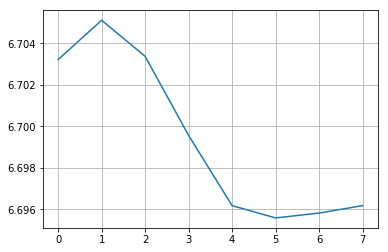

In [18]:
plt.figure(1)
plt.plot(history_state_means[:, 0], label="Slope")
plt.grid()
plt.show()